In [1]:
using Base.Iterators: repeated
using Flux, Flux.Data.MNIST
using Flux: onehotbatch, argmax, crossentropy, throttle
using Images

┌ Info: Precompiling Flux [587475ba-b771-5e3f-ad9e-33799f191a9c]
└ @ Base loading.jl:1278
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278


┌ Info: Precompiling ImageIO [82e4d734-157c-48bb-816b-45c225c6df19]
└ @ Base loading.jl:1278
┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1278
┌ Info: Precompiling QuartzImageIO [dca85d43-d64c-5e67-8c65-017450d5d020]
└ @ Base loading.jl:1278


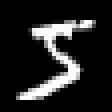

In [4]:
imgs = MNIST.images()
colorview(Gray, imgs[1])

In [5]:
typeof(imgs[1])

Array{Gray{Normed{UInt8,8}},2}

In [6]:
myFloat32(X) = Float32.(X)
fptimgs = myFloat32.(imgs)

60000-element Array{Array{Float32,2},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0

In [7]:
typeof(fptimgs)

Array{Array{Float32,2},1}

In [9]:
vectorize(x) = x[:]
vectorized_imgs = vectorize.(fptimgs)

60000-element Array{Array{Float32,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.

In [10]:
typeof(vectorized_imgs)

Array{Array{Float32,1},1}

In [13]:
X = hcat(vectorized_imgs...)
size(X)

(784, 60000)

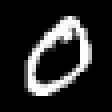

In [14]:
onefig = X[:, 2]
t1 = reshape(onefig, 28, 28)
colorview(Gray, t1)

In [15]:
labels = MNIST.labels();

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/dsatterthwaite/.julia/packages/Flux/qp1gc/src/data/Data.jl:17


In [17]:
Y = onehotbatch(labels, 0:9);

In [18]:
m = Chain(Dense(28^2, 32, relu), Dense(32, 10), softmax)

Chain(Dense(784, 32, relu), Dense(32, 10), softmax)

In [19]:
m(onefig)

10-element Array{Float32,1}:
 0.057735477
 0.09306799
 0.11915781
 0.084744155
 0.14430709
 0.109094255
 0.100647576
 0.10569193
 0.05303317
 0.13252051

In [20]:
loss(x, y) = Flux.crossentropy(m(x), y)
accuracy(x, y) = mean(argmax(m(x)) .== argmax(y))

accuracy (generic function with 1 method)

In [22]:
datasetx = repeated((X, Y), 200)
C = collect(datasetx);

In [23]:
evalcb = () -> @show(loss(X, Y))

#1 (generic function with 1 method)

In [24]:
ps = Flux.params(m)

Params([Float32[-0.0376784 -0.023154475 … 0.06413202 -0.022499237; -0.053033177 0.036455404 … -0.08277668 -0.04861379; … ; -0.03312733 0.02638971 … -0.07710997 -0.023141205; 0.045121588 -0.04891753 … -0.017109873 0.055367395], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.020268746 0.104422644 … 0.20313874 -0.02671395; -0.31808794 0.17163272 … 0.16586977 -0.17984885; … ; 0.025803171 -0.17654608 … -0.05546042 -0.18999457; 0.023532035 0.029639043 … 0.3662422 0.03900754], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [25]:
opt = ADAM()
Flux.train!(loss, ps, datasetx, opt, cb=throttle(evalcb, 10))

loss(X, Y) = 2.3121448f0
loss(X, Y) = 0.7824812f0
loss(X, Y) = 0.45097578f0
loss(X, Y) = 0.353784f0
loss(X, Y) = 0.3054124f0
loss(X, Y) = 0.27423143f0


In [26]:
tX = hcat(float.(reshape.(MNIST.images(:test), :))...);
test_image = m(tX[:, 1])

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data /Users/dsatterthwaite/.julia/packages/Flux/qp1gc/src/data/Data.jl:17


10-element Array{Float32,1}:
 0.00021020707
 2.9773878f-6
 0.0001754158
 0.0016458081
 3.6717116f-5
 4.9691378f-5
 1.1972155f-6
 0.995924
 0.00075291365
 0.0012009481

In [27]:
argmax(test_image) - 1

7

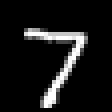

In [28]:
t1 = reshape(tX[:, 1], 28, 28)
colorview(Gray, t1)

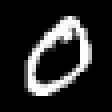

In [30]:
onefig  = X[:, 2]
colorview(Gray, reshape(onefig, 28, 28))

In [31]:
m(onefig)

10-element Array{Float32,1}:
 0.99932265
 5.5197958f-8
 6.284042f-5
 7.739344f-5
 2.5247004f-7
 0.000326086
 3.023236f-5
 6.463573f-5
 5.6687193f-5
 5.907203f-5

In [32]:
Y[:, 2]

10-element Flux.OneHotVector{10,UInt32}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0